# Project 5: 

The advective equation otherwise known as the convection equation is a partial differential equation (PDE) that describes the motion of a fluid or a scalar field due to advection. Advection is the transport of a property (such as mass, momentum, or energy) by a fluid or a scalar field. We would typically see it in the form

$$
\frac{\partial u}{\partial t}=-v\frac{\partial u}{\partial x},
$$

where $v$ is the so-called "velocity" of the advection. This linear first-order hyperbolic partial differential equation is one that is commonly used when studying oceanic dynamics, geophysics, atmospheric chemistry and more. We will seek to find the solution to this equation given some initial conditions.

Numerically, we will use Gaussian initial conditions $$u(x,0)=u_{0}e^{-\frac{(x-x_{0})}{w^{2}}}$$ where $x$ is the position and $w$ is the width of the advection. Set the intial amplitude of the pulse to be $u_{0}=1$, the initial position $x_{0}=0.5$, the width $w=1$, and the velocity $v=10$. Set the step size of the position grid be $\Delta x=0.01$ and the time grid to be $\Delta t=0.0005$ and the number of steps for the position and time respectively to be $N_{x}=1000$ and $N_{t}=50$. Lastly, solve this over a position grid encompassing $-(1/2)N_{x}\Delta x\leq x \leq (1/2)N_{x}\Delta x$ and time grid encompassing $0\leq t\leq N_{t}\Delta t$.

1. The exact solution to this PDE is $$u_{\text{exact}}(x,t) = u_{0}e^{-\frac{(x-vt-x_{0})^{2}}{w^{2}}},$$ 
    1. Plot the contour of the solution.
    2. Plot the trace of the solution at the final time and save the result for easy comparison.
    
2. Using the Euler method, discretize the PDE.
    1. Write the matrix form.
    2. Write a function that solves this system given the parameter space.
    3. Plot the contour of the solution.
    4. Plot the trace of the solution at the final time and save the result.

### Solutions:

We import the relevant packages for this task

In [44]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-notebook')

We allocate an array to store the final time

In [45]:
final = []

We were given a parameter space to use, so we start the calculation by defining these and building the relevant grids over which we will evaluate the initial conditions. 

In [46]:
dx = 0.01   # x step
dt = 0.0005 # t step
Nx = 1000   # x points
Nt = 50     # t points

u0 = 1      # Initial amplitude
v = 10      # Advection velocity
x0 = 0.5    # Initial position
w = 1     # Width

x_grid = np.linspace(-dx*Nx/2, dx*Nx/2, Nx) # x grid
ic = u0*np.exp(-(x_grid-x0)**2/w**2)        # Initial Gaussian packet

1. Given the exact solution and parameters, we simply need to construct a two dimensional grid and map the function onto it.

In [47]:
X, T = np.meshgrid(x_grid, np.linspace(0, Nt*dt, Nt)) # x and t meshgrid
solution_analytical = u0*np.exp(-(X-v*T-x0)**2/(w**2)).T # Apply meshgrid to real solution

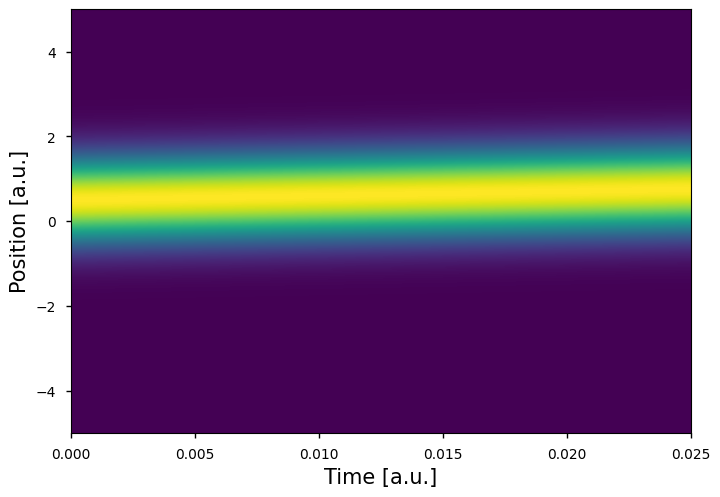

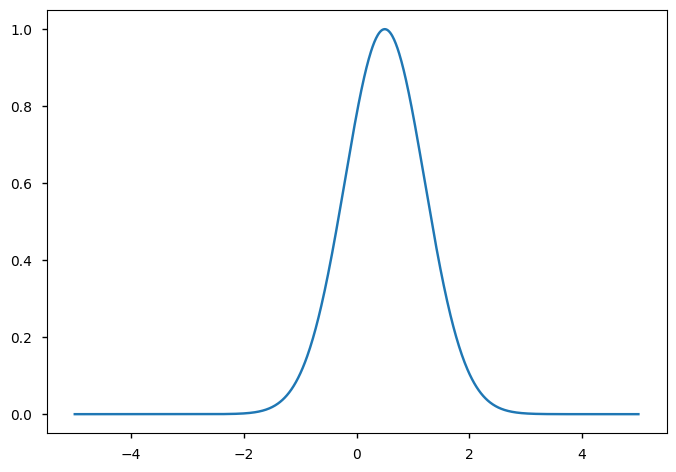

In [48]:
plt.imshow(solution_analytical, aspect='auto', origin='lower', extent=[0, Nt*dt, x_grid[0], x_grid[-1]]) # Visualize
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Position [a.u.]', fontsize=15)
plt.show()

plt.plot(x_grid, solution_analytical[:,0])
plt.show()

2. 

In [49]:
def euler(discrete_matrix, initial_condition, grid_x:np.array, points:list):
    """
    This function accepts a matrix generalized by the RHS of an Euler scheme. It then solves it
    by forward time propogation.
    
    Args:
        discrete_matrix (array): A (Nx, Nt) matrix disretizing the system based on the positional propogation (i+1, i, i-1)
        initial_condition (array): A (1, Nx) array of values to populate the t=0 position
        grid_x (array): The (1, Nx) grid of positional points to evaluate the system
        points (list): A list of position and time points for desired resolution [Nx, Nt]

    Returns:
        array: The (Nx, Nt) containing the approximation of the solution
    """    
    points_x, points_y = points

    approximation = np.zeros((points_x, points_y))
    approximation[:,0] = initial_condition
    
    for j in range(0, points_y-1):
        approximation[:,j+1] = np.dot(discrete_matrix, approximation[:,j])
    return approximation

We now translate the Euler method into a matrix as defined at the beginning and plug this into the function we created to solve the system.

In [50]:
a = (dt*v)/(2*dx) # RHS parameter
A =   np.eye(Nx) + \
    a*np.diag(np.ones(Nx-1),-1) + \
   -a*np.diag(np.ones(Nx-1), 1)
   
solution_euler = euler(A, ic, x_grid, [Nx, Nt])

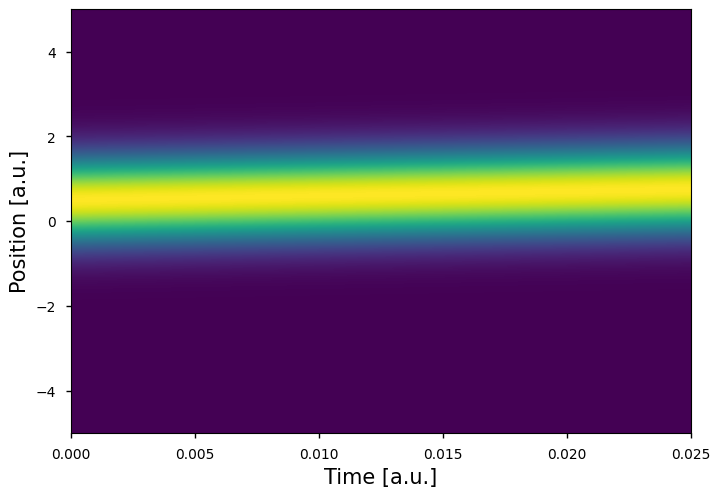

In [51]:
plt.imshow(solution_euler, aspect='auto', origin='lower', extent=[0, Nt*dt, x_grid[0], x_grid[-1]])
plt.xlabel('Time [a.u.]', fontsize=15)
plt.ylabel('Position [a.u.]', fontsize=15)
plt.show()

compare to the real solution

Now we use the lax method